In [144]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [40]:
raw_data=pd.read_csv('Lekagul Sensor Data.csv')

In [41]:
raw_data

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7


In [42]:
date=raw_data['Timestamp'].str.split(expand=True)

In [43]:
raw_data['time']=date[1]

In [44]:
raw_data.groupby(['car-id']).head()

,Timestamp,car-id,car-type,gate-name,time
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3,00:43:28
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1,01:03:48
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2,01:06:24
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0,01:09:25
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2,01:12:36
...,...,...,...,...,...
171469,2016-05-31 23:30:03,20165831105856-579,1,general-gate1,23:30:03
171470,2016-05-31 23:33:00,20161031111001-854,6,general-gate2,23:33:00
171471,2016-05-31 23:36:42,20161031111001-854,6,ranger-stop0,23:36:42
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2,23:40:13


In [45]:
car_ids=list(raw_data['car-id'].unique())

In [46]:
gate_names=list(raw_data['gate-name'].unique())

In [47]:
for gate in gate_names:
    raw_data[gate]=np.nan    

In [48]:
for gate in gate_names:
    raw_data.loc[raw_data['gate-name'] == gate, gate] = raw_data.loc[raw_data['gate-name'] == gate, 'time']

In [50]:
raw_data.loc[raw_data['car-id']=='20154301124328-262'].query('entrance3==entrance3')['entrance3']

0    00:43:28
Name: entrance3, dtype: object

In [55]:
iten_data=raw_data.groupby(['car-id']).first()

In [130]:
def time_to_float(time):
    if time is None:
        time_val=-86400
    else:
        time_val=0
        time_parts=re.split('[:]',time)
        time_parts.reverse()
        for part in range(0,3):
            time_val=time_val+float(time_parts[part])*60**part
    return time_val

In [61]:
iten_data.drop(columns=['Timestamp','time','gate-name'],inplace=True)

In [62]:
iten_data.head()

,car-type,entrance3,general-gate1,ranger-stop2,ranger-stop0,general-gate2,general-gate5,entrance4,entrance1,general-gate7,...,gate6,gate7,ranger-stop7,camping4,gate2,ranger-stop1,general-gate0,camping1,gate1,gate0
car-id,,,,,,,,,,,,,,,,,,,,,
20150001010009-284,3,13:00:09,13:20:53,13:23:32,13:26:36,13:29:51,13:41:28,None,None,None,...,None,None,None,None,None,None,None,None,None,None
20150001050042-811,1,None,None,None,None,None,None,17:53:47,None,None,...,None,None,None,None,None,None,None,None,None,None
20150001060025-421,2,None,06:31:09,06:28:30,06:25:26,06:22:11,06:10:32,06:00:25,None,None,...,None,None,None,None,None,None,None,None,None,None
20150001070000-174,1,None,07:26:39,07:24:14,07:21:25,07:18:27,None,None,07:55:32,07:43:28,...,None,None,None,None,None,None,None,None,None,None
20150001070006-104,1,None,07:28:18,07:25:44,07:22:46,07:19:37,None,None,20:54:09,07:46:07,...,None,None,None,None,None,None,None,None,None,None


In [131]:
vec_iten=iten_data.iloc[:,2:].applymap(time_to_float)

In [132]:
vec_iten

,general-gate1,ranger-stop2,ranger-stop0,general-gate2,general-gate5,entrance4,entrance1,general-gate7,general-gate4,entrance2,...,gate6,gate7,ranger-stop7,camping4,gate2,ranger-stop1,general-gate0,camping1,gate1,gate0
car-id,,,,,,,,,,,,,,,,,,,,,
20150001010009-284,48053.0,48212.0,48396.0,48591.0,49288.0,-86400.0,-86400.0,-86400.0,-86400.0,71276.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0
20150001050042-811,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,64427.0,-86400.0,-86400.0,-86400.0,61242.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0
20150001060025-421,23469.0,23310.0,23126.0,22931.0,22232.0,21625.0,-86400.0,-86400.0,-86400.0,-86400.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0
20150001070000-174,26799.0,26654.0,26485.0,26307.0,-86400.0,-86400.0,28532.0,27808.0,27418.0,25200.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0
20150001070006-104,26898.0,26744.0,26566.0,26377.0,-86400.0,-86400.0,75249.0,27967.0,27554.0,25206.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165928085923-695,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0
20165928125928-824,48542.0,48389.0,48212.0,48024.0,47350.0,46768.0,50367.0,49606.0,49194.0,-86400.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0
20165929085939-676,-86400.0,-86400.0,-86400.0,-86400.0,32994.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0


In [141]:
embed_iten=vec_iten.copy()

In [146]:
pt1=vec_iten.loc['20150001010009-284']
pt2=vec_iten.loc['20150001070000-174']
pt3=vec_iten.loc['20150001070006-104']

In [148]:
np.linalg.norm(pt1-pt2)

283223.299377011

In [150]:
np.linalg.norm(pt1-pt3)

326195.3289855635

In [149]:
np.linalg.norm(pt3-pt2)

124086.39409701613

In [245]:
clusters = DBSCAN(eps=150000,min_samples=50).fit(vec_iten)

In [248]:
pd.Series(clusters.labels_).unique()

array([ 0,  1,  2,  3, -1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [249]:
embed_iten['cluster']=pd.Series(clusters.labels_,index=embed_iten.index)

In [135]:
tsne_result = TSNE().fit_transform(vec_iten)

C:\Users\josep\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\josep\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [137]:
len(tsne_result)

18708

In [228]:
embed_iten['tsne-2d-one'] = tsne_result[:,0]
embed_iten['tsne-2d-two'] = tsne_result[:,1]

In [259]:
embed_iten['car_type']=iten_data['car-type']

In [260]:
embed_iten

,general-gate1,ranger-stop2,ranger-stop0,general-gate2,general-gate5,entrance4,entrance1,general-gate7,general-gate4,entrance2,...,gate2,ranger-stop1,general-gate0,camping1,gate1,gate0,tsne-2d-one,tsne-2d-two,cluster,car_type
car-id,,,,,,,,,,,,,,,,,,,,,
20150001010009-284,48053.0,48212.0,48396.0,48591.0,49288.0,-86400.0,-86400.0,-86400.0,-86400.0,71276.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,85.660286,38.170799,0,3
20150001050042-811,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,64427.0,-86400.0,-86400.0,-86400.0,61242.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,60.169300,-25.834761,1,1
20150001060025-421,23469.0,23310.0,23126.0,22931.0,22232.0,21625.0,-86400.0,-86400.0,-86400.0,-86400.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-1.998835,-49.473969,0,2
20150001070000-174,26799.0,26654.0,26485.0,26307.0,-86400.0,-86400.0,28532.0,27808.0,27418.0,25200.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,9.762652,-39.286186,2,1
20150001070006-104,26898.0,26744.0,26566.0,26377.0,-86400.0,-86400.0,75249.0,27967.0,27554.0,25206.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-1.770884,11.813250,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165928085923-695,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,84.044785,20.558260,7,1
20165928125928-824,48542.0,48389.0,48212.0,48024.0,47350.0,46768.0,50367.0,49606.0,49194.0,-86400.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,8.645923,23.739784,4,2
20165929085939-676,-86400.0,-86400.0,-86400.0,-86400.0,32994.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,...,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-86400.0,-19.991564,-52.788956,14,2P


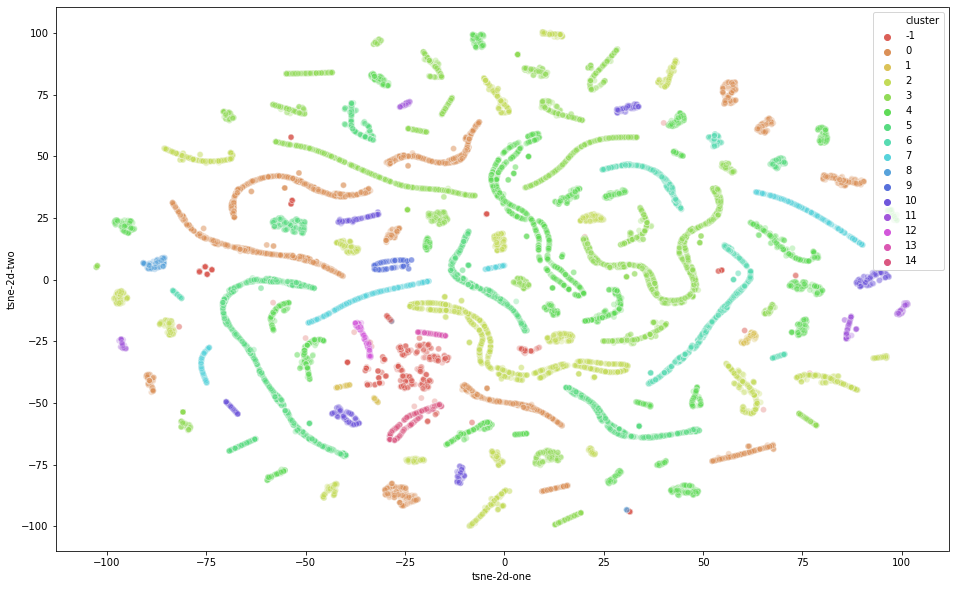

In [269]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", len(pd.Series(clusters.labels_).unique())),
    hue='cluster',
    data=embed_iten,
    legend="full",
    alpha=0.3
)

In [246]:
pd.Series(clusters.labels_).value_counts()

 3     3754
 4     3337
 2     2863
 0     2429
 5     2151
 6     1019
 7      751
-1      664
 10     598
 11     278
 14     221
 1      162
 12     146
 9      139
 8      116
 13      80
dtype: int64

In [225]:
cluster_iten=embed_iten.sort_values('cluster')

In [273]:
indices=cluster_iten.loc[cluster_iten['cluster']==-1].index

In [277]:
iten_data[iten_data['car-type']=='4']

,car-type,entrance3,general-gate1,ranger-stop2,ranger-stop0,general-gate2,general-gate5,entrance4,entrance1,general-gate7,...,gate6,gate7,ranger-stop7,camping4,gate2,ranger-stop1,general-gate0,camping1,gate1,gate0
car-id,,,,,,,,,,,,,,,,,,,,,
20150002060008-683,4,None,None,None,None,None,None,None,18:29:59,18:18:03,...,None,None,None,None,None,None,None,None,None,None
20150004070037-579,4,None,19:33:30,19:30:39,19:27:22,19:23:53,19:11:24,19:00:37,20:07:21,19:53:14,...,None,None,None,None,None,None,None,None,None,None
20150004110002-747,4,None,11:25:29,11:23:10,11:20:29,11:17:38,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
20150006030021-893,4,15:32:04,None,None,None,None,None,None,15:00:21,15:15:09,...,None,None,None,None,None,None,None,None,None,None
20150006040002-269,4,None,16:01:42,16:04:37,16:07:59,16:11:32,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165905065935-132,4,None,None,None,None,None,None,18:59:35,None,None,...,None,None,None,None,None,None,None,None,None,None
20165907035900-140,4,None,04:27:17,04:24:51,04:22:02,04:19:03,04:08:18,03:59:00,None,None,...,None,None,None,None,None,None,None,None,None,None
20165914075959-50,4,None,20:01:24,20:03:56,20:06:50,20:09:55,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [279]:
iten_data.filter(indices, axis=0)[iten_data['car-type']=='4']

C:\Users\josep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,car-type,entrance3,general-gate1,ranger-stop2,ranger-stop0,general-gate2,general-gate5,entrance4,entrance1,general-gate7,...,gate6,gate7,ranger-stop7,camping4,gate2,ranger-stop1,general-gate0,camping1,gate1,gate0
car-id,,,,,,,,,,,,,,,,,,,,,
20150416040441-902,4,04:04:41,None,None,None,None,04:12:42,None,None,None,...,04:06:23,None,None,None,None,None,None,None,None,None
20150505020522-625,4,02:05:22,None,None,None,None,02:14:16,None,None,None,...,02:07:15,None,None,None,None,None,None,None,None,None
20164531024545-131,4,02:45:45,None,None,None,None,02:54:25,None,None,None,...,02:47:37,None,None,None,None,None,None,None,None,None
20152824032830-251,4,03:28:30,None,None,None,None,03:38:56,None,None,None,...,03:30:43,None,None,None,None,None,None,None,None,None
20154901044910-777,4,04:49:10,None,None,None,None,04:57:35,None,None,None,...,04:50:58,None,None,None,None,None,None,None,None,None
20154907044911-419,4,04:49:11,None,None,None,None,04:59:27,None,None,None,...,04:51:22,None,None,None,None,None,None,None,None,None
20165003035005-470,4,03:50:05,None,None,None,None,03:59:43,None,None,None,...,03:52:08,None,None,None,None,None,None,None,None,None
20152925022919-735,4,02:29:19,None,None,None,None,02:39:09,None,None,None,...,02:31:25,None,None,None,None,None,None,None,None,None
20155201025245-696,4,02:52:45,None,None,None,None,03:00:51,None,None,None,...,02:54:29,None,None,None,None,None,None,None,None,None


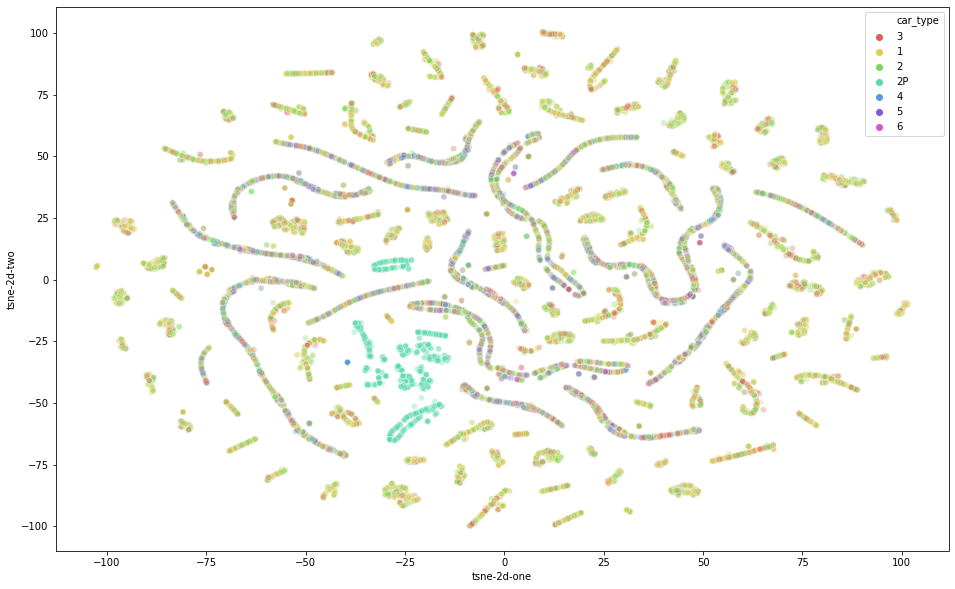

In [270]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", len(iten_data['car-type'].unique())),
    hue='car_type',
    data=embed_iten,
    legend="full",
    alpha=0.3
)